<a target="_blank" href="https://colab.research.google.com/github/sky1ove/katlas/blob/main/nbs/tutorial_03_high_throughput.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Phosphoproteomics scoring

In this session, instead of scoring sequence one by one, we will score the whole phosphoproteomics dataset at once (within minutes!)

Moreover, we will plot the score distribution of a kinase, and check its substrates.

## Setup

In [ ]:
!pip install git+https://github.com/sky1ove/katlas.git -Uq

In [ ]:
import pandas as pd,numpy as np,seaborn as sns
from matplotlib import pyplot as plt
from katlas.core import *
from katlas.plot import *

set_sns()

## Phosphoproteomics dataset

Three datasets are available:

- PhosphoSitePlus human (2024 Jan)
- Ochoa et al. human phosphoproteom
- Combine Ochoa and PSP low throughput data

In [ ]:
psp = Data.get_psp_human_site()
ochoa = Data.get_ochoa_site()
comb = Data.get_combine_site_psp_ochoa()

In [ ]:
psp.head()

,gene,protein,uniprot,site,gene_site,SITE_GRP_ID,species,site_seq,LT_LIT,MS_LIT,MS_CST,CST_CAT#,Ambiguous_Site
0,YWHAB,14-3-3 beta,P31946,T2,YWHAB_T2,15718712,human,______MtMDksELV,NaN,3.0,1.0,None,0
1,YWHAB,14-3-3 beta,P31946,S6,YWHAB_S6,15718709,human,__MtMDksELVQkAk,NaN,8.0,NaN,None,0
2,YWHAB,14-3-3 beta,P31946,Y21,YWHAB_Y21,3426383,human,LAEQAERyDDMAAAM,NaN,NaN,4.0,None,0
3,YWHAB,14-3-3 beta,P31946,T32,YWHAB_T32,23077803,human,AAAMkAVtEQGHELs,NaN,NaN,1.0,None,0
4,YWHAB,14-3-3 beta,P31946,S39,YWHAB_S39,27442700,human,tEQGHELsNEERNLL,NaN,4.0,NaN,None,0


In [ ]:
ochoa.head()

,uniprot,position,residue,is_disopred,disopred_score,log10_hotspot_pval_min,isHotspot,uniprot_position,functional_score,current_uniprot,name,gene,Sequence,is_valid,site_seq,gene_site
0,A0A075B6Q4,24,S,True,0.91,6.839384,True,A0A075B6Q4_24,0.149257,A0A075B6Q4,A0A075B6Q4_HUMAN,None,MDIQKSENEDDSEWEDVDDEKGDSNDDYDSAGLLSDEDCMSVPGKTHRAIADHLFWSEETKSRFTEYSMTSSVMRRNEQLTLHDERFEKFYEQYDDDEIGALDNAELEGSIQVDSNRLQEVLNDYYKEKAEKWQSGIVSL,True,VDDEKGDSNDDYDSA,A0A075B6Q4_S24
1,A0A075B6Q4,35,S,True,0.87,9.192622,False,A0A075B6Q4_35,0.136966,A0A075B6Q4,A0A075B6Q4_HUMAN,None,MDIQKSENEDDSEWEDVDDEKGDSNDDYDSAGLLSDEDCMSVPGKTHRAIADHLFWSEETKSRFTEYSMTSSVMRRNEQLTLHDERFEKFYEQYDDDEIGALDNAELEGSIQVDSNRLQEVLNDYYKEKAEKWQSGIVSL,True,YDSAGLLSDEDCMSV,A0A075B6Q4_S35
2,A0A075B6Q4,57,S,False,0.28,0.818834,False,A0A075B6Q4_57,0.125364,A0A075B6Q4,A0A075B6Q4_HUMAN,None,MDIQKSENEDDSEWEDVDDEKGDSNDDYDSAGLLSDEDCMSVPGKTHRAIADHLFWSEETKSRFTEYSMTSSVMRRNEQLTLHDERFEKFYEQYDDDEIGALDNAELEGSIQVDSNRLQEVLNDYYKEKAEKWQSGIVSL,True,IADHLFWSEETKSRF,A0A075B6Q4_S57
3,A0A075B6Q4,68,S,False,0.03,0.375986,False,A0A075B6Q4_68,0.119811,A0A075B6Q4,A0A075B6Q4_HUMAN,None,MDIQKSENEDDSEWEDVDDEKGDSNDDYDSAGLLSDEDCMSVPGKTHRAIADHLFWSEETKSRFTEYSMTSSVMRRNEQLTLHDERFEKFYEQYDDDEIGALDNAELEGSIQVDSNRLQEVLNDYYKEKAEKWQSGIVSL,True,KSRFTEYSMTSSVMR,A0A075B6Q4_S68
4,A0A075B6Q4,71,S,False,0.05,0.000000,False,A0A075B6Q4_71,0.095193,A0A075B6Q4,A0A075B6Q4_HUMAN,None,MDIQKSENEDDSEWEDVDDEKGDSNDDYDSAGLLSDEDCMSVPGKTHRAIADHLFWSEETKSRFTEYSMTSSVMRRNEQLTLHDERFEKFYEQYDDDEIGALDNAELEGSIQVDSNRLQEVLNDYYKEKAEKWQSGIVSL,True,FTEYSMTSSVMRRNE,A0A075B6Q4_S71


In [ ]:
comb.head()

,site_seq,gene_site,gene,source,num_site,acceptor,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7
0,AAAAAAASGGAGSDN,PBX1_S136,PBX1,ochoa,1,S,A,A,A,A,A,A,A,S,G,G,A,G,S,D,N
1,AAAAAAASGGGVSPD,PBX2_S146,PBX2,ochoa,1,S,A,A,A,A,A,A,A,S,G,G,G,V,S,P,D
2,AAAAAAASGVTTGKP,CLASR_S349,CLASR,ochoa,1,S,A,A,A,A,A,A,A,S,G,V,T,T,G,K,P
3,AAAAAAASQQGSAKN,TBL1R_S119,TBL1R,ochoa,1,S,A,A,A,A,A,A,A,S,Q,Q,G,S,A,K,N
4,AAAAAAASSPVGVGQ,SOX3_S249,SOX3,ochoa,1,S,A,A,A,A,A,A,A,S,S,P,V,G,V,G,Q


It should be noted that while the first two datasets are more like raw data which is directly downloaded from the web, the third one is a combined of them, and processed through get_unique_site (remove duplicated sequence). `num_site` indicates number of duplicates.

In [ ]:
comb.num_site.value_counts()

1     111632
2       4466
3        404
4        157
5         84
6         58
7         47
8         18
9          9
11         3
10         3
21         3
12         2
14         1
Name: num_site, dtype: int64

## Scoring on all-capital sequence

In [ ]:
comb.head()

,site_seq,gene_site,gene,source,num_site,acceptor,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7
0,AAAAAAASGGAGSDN,PBX1_S136,PBX1,ochoa,1,S,A,A,A,A,A,A,A,S,G,G,A,G,S,D,N
1,AAAAAAASGGGVSPD,PBX2_S146,PBX2,ochoa,1,S,A,A,A,A,A,A,A,S,G,G,G,V,S,P,D
2,AAAAAAASGVTTGKP,CLASR_S349,CLASR,ochoa,1,S,A,A,A,A,A,A,A,S,G,V,T,T,G,K,P
3,AAAAAAASQQGSAKN,TBL1R_S119,TBL1R,ochoa,1,S,A,A,A,A,A,A,A,S,Q,Q,G,S,A,K,N
4,AAAAAAASSPVGVGQ,SOX3_S249,SOX3,ochoa,1,S,A,A,A,A,A,A,A,S,S,P,V,G,V,G,Q


In [ ]:
comb.acceptor.value_counts()

S    85208
T    24250
Y     7429
Name: acceptor, dtype: int64

It looks that the sequence are in all-capital format, so we will use `param_CDDM_upper`

In [ ]:
cddm = predict_kinase_df(comb,'site_seq',**param_CDDM_upper)

input dataframe has a length 116887
Preprocessing
Finish preprocessing
Calculating position: [-7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7]


100%|██████████| 289/289 [02:22<00:00,  2.03it/s]


In [ ]:
pspa = predict_kinase_df(comb,'site_seq',**param_PSPA)

input dataframe has a length 116887
Preprocessing
Finish preprocessing
Calculating position: [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]


100%|██████████| 396/396 [05:12<00:00,  1.27it/s]


To accelerate PSPA scoring, we can split S/T and Y sites for scoring.

In [ ]:
y_idx = comb['acceptor']=="Y"

In [ ]:
comb_y = comb[y_idx]
comb_st = comb[~y_idx]

In [ ]:
pspa_y = predict_kinase_df(comb_y,'site_seq',**param_PSPA_y)
pspa_st = predict_kinase_df(comb_st,'site_seq',**param_PSPA_st)

input dataframe has a length 7429
Preprocessing
Finish preprocessing
Calculating position: [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]


100%|██████████| 93/93 [00:04<00:00, 20.84it/s]


input dataframe has a length 109458
Preprocessing
Finish preprocessing
Calculating position: [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4]


100%|██████████| 303/303 [03:59<00:00,  1.27it/s]


## Scoring on phosphorylated sequence

In [ ]:
psp.head()

,gene,protein,uniprot,site,gene_site,SITE_GRP_ID,species,site_seq,LT_LIT,MS_LIT,MS_CST,CST_CAT#,Ambiguous_Site
0,YWHAB,14-3-3 beta,P31946,T2,YWHAB_T2,15718712,human,______MtMDksELV,NaN,3.0,1.0,None,0
1,YWHAB,14-3-3 beta,P31946,S6,YWHAB_S6,15718709,human,__MtMDksELVQkAk,NaN,8.0,NaN,None,0
2,YWHAB,14-3-3 beta,P31946,Y21,YWHAB_Y21,3426383,human,LAEQAERyDDMAAAM,NaN,NaN,4.0,None,0
3,YWHAB,14-3-3 beta,P31946,T32,YWHAB_T32,23077803,human,AAAMkAVtEQGHELs,NaN,NaN,1.0,None,0
4,YWHAB,14-3-3 beta,P31946,S39,YWHAB_S39,27442700,human,tEQGHELsNEERNLL,NaN,4.0,NaN,None,0


It looks that the sequence are in phosphorylated status, so we will use `param_CDDM`

Directly run psp in `predict_kinase_df` will gives an error, as some of the site_sequence do not have S/T/Y at the center. We need to clean them before process.

In [ ]:
psp.site_seq.str[7].value_counts()

s    141851
t     58761
y     39367
h        14
k         4
r         3
g         3
p         2
n         1
f         1
l         1
a         1
i         1
d         1
Name: site_seq, dtype: int64

In [ ]:
psp = psp[psp.site_seq.str[7].isin(['s','t','y'])]

In [ ]:
cddm = predict_kinase_df(psp,'site_seq',**param_CDDM)

input dataframe has a length 239979
Preprocessing
Finish preprocessing
Calculating position: [-7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7]



100%|██████████| 289/289 [04:35<00:00,  1.05it/s]


In [ ]:
pspa = predict_kinase_df(psp,'site_seq',**param_PSPA)

input dataframe has a length 116887
Preprocessing
Finish preprocessing
Calculating position: [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]



100%|██████████| 396/396 [05:14<00:00,  1.26it/s]


## Plot substrate score distribution of a kinase

In [ ]:
psp['acceptor'] = psp['site_seq'].str[7]

In [ ]:
palette = get_color_dict(['S','T','Y','t', 's', 'y'],'tab10')

hist_params = {'element':'poly',
              'edgecolor': None,
              'alpha':0.5,
              'bins':100,
              'kde':True,
              'palette':palette}

In [ ]:
def plot_hist(df,kinase,hue=None):
    plt.figure(figsize=(6,2))
    sns.histplot(data=df,x=kinase,hue=hue,**hist_params)
    plt.xlabel('')
    plt.title(kinase)

In [ ]:
set_sns()

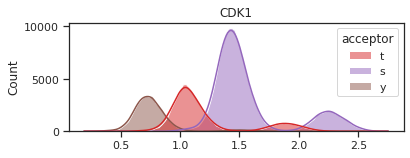

In [ ]:
plot_hist(cddm,'CDK1',hue=psp['acceptor'] )

## Get the gene names in the positive peaks

In [ ]:
cddm

kinase,SRC,EPHA3,FES,NTRK3,ALK,EPHA8,ABL1,FLT3,EPHB2,FYN,RET,PKACA,EPHB1,MUSK,INSR,EPHB3,FER,EPHB4,NTRK1,ROS1,TYRO3,SYK,TNK1,YES1,MET,BMX,FLT4,LTK,FRK,ERK2,LCK,FGFR1,MST1R,EPHA5,FGFR2,CDK1,TEK,IKKB,FGR,JAK3,LYN,SRMS,TEC,EPHA2,EPHA1,PDGFRA,INSRR,IGF1R,ERK1,BTK,AXL,PKCA,EPHA7,CDK2,ERBB4,MERTK,BLK,JAK2,PTK6,HCK,ABL2,JNK1,P38A,MLK1,PDGFRB,EPHA6,KDR,NEK6,PLK1,CK2A1,PTK2B,EGFR,DYRK2,P38D,HGK,TTBK1,MST3,NTRK2,MST1,IKKE,MST2,CSF1R,MINK,DDR2,NEK7,NEK2,TXK,ZAP70,CDK5,NEK1,MST4,QIK,P38G,KIT,CHK1,CAMK2A,KHS1,FGFR3,YSK1,CK1D,AKT1,RSK3,NEK4,GSK3B,TNIK,ITK,MAPKAPK3,TAO2,AURB,NIM1,FGFR4,MLK3,PAK3,FLT1,AURA,PIM1,EPHA4,AURC,MSK1,MARK4,CAMK2G,PLK3,ZAK,NEK9,P70S6K,PAK1,SGK3,MARK2,GCK,MLK2,PAK2,MEKK1,TBK1,CAMK2D,P90RSK,PHKG2,DYRK3,IKKA,P38B,TSSK1,ERK5,PIM3,TLK1,TAK1,JNK2,NLK,LIMK1,MAPKAPK5,SIK,DCAMKL2,MATK,AMPKA1,MAPKAPK2,CK2A2,CDK9,PKCB,JNK3,ALK4,IRAK1,RSK4,TNK2,IRAK4,DSTYK,CAMK2B,PKACB,PRKD3,PKCT,MARK1,MNK2,SGK1,DYRK4,MARK3,TAO1,TLK2,TSSK2,CK1E,PKG2,PRKD1,RSK2,AKT2,BUB1B,ULK3,DAPK1,GRK2,ROCK1,BMPR1B,PTK2,NEK11,LATS2,DYRK1A,CSK,CK1G2,CDK6,CK1A,PKCZ,GRK5,WNK3,ROCK2,ALK2,CAMKK1,ATM,PKG1,TGFBR1,AMPKA2,TYK2,PKN1,PKCG,MSK2,JAK1,NUAK2,GRK7,LKB1,WNK1,AKT3,PKCD,ICK,PBK,SKMLCK,LATS1,SGK2,WNK2,CAMK4,CK1G1,PRKD2,PLK4,PKCH,WEE1,CDK3,CHK2,CDK7,PKCE,CK1G3,PKCI,SLK,PRKX,DCAMKL1,EEF2K,MELK,CAMKK2,MEK2,HIPK2,CDK4,MTOR,PAK6,GSK3A,MOK,NDR1,NUAK1,PIM2,MEK1,TESK1,ERK7,NDR2,OSR1,CLK1,COT,ACVR2A,HIPK4,MEKK2,LRRK2,PHKG1,MAP2K4,PAK5,PERK,MOS,DNAPK,P70S6KB,CLK3,LIMK2,BRSK2,PAK4,STLK3,CAMK1A,CAMK1D,HASPIN,HIPK1,ASK1,ATR,MPSK1,MEK5,PKN2,MAP2K7,MRCKB,HIPK3,CDK8,BUB1,MEKK3,MAP2K3,GRK1
0,0.433796,0.498380,0.454458,0.473864,0.428906,0.483233,0.430170,0.446031,0.471336,0.453847,0.460419,0.508408,0.484407,0.467609,0.457033,0.443433,0.484840,0.468533,0.468457,0.467941,0.478715,0.489762,0.422144,0.466954,0.472683,0.482010,0.513100,0.473902,0.485369,0.612148,0.449466,0.455054,0.451669,0.483101,0.473075,0.755992,0.461925,0.556426,0.466985,0.459445,0.405355,0.496064,0.489487,0.520342,0.467685,0.469986,0.449660,0.489013,0.659188,0.479022,0.429474,0.561566,0.496131,0.805757,0.483604,0.433727,0.433152,0.416932,0.449736,0.462231,0.443608,0.708832,0.763721,0.764763,0.485598,0.503095,0.530672,0.710085,0.787471,0.712322,0.430602,0.484071,0.591707,0.683422,1.085441,0.687179,0.997576,0.430411,1.059941,0.494356,1.107019,0.452383,1.062108,0.478486,0.628227,0.632510,0.496833,0.485099,0.641354,0.977783,0.997615,0.454183,0.651985,0.484124,0.703195,0.754501,0.969054,0.471635,0.983395,0.667375,0.686471,0.562171,1.003086,0.908852,1.099186,0.472847,0.551448,0.965854,0.551427,0.389488,0.479736,0.677951,0.535160,0.465742,0.540969,0.593693,0.479491,0.477445,0.643805,0.476090,0.783216,0.828584,0.842642,0.612835,0.594419,0.519095,0.640301,0.478714,1.067336,0.877327,0.520289,0.812326,0.434395,0.793134,0.519982,0.533642,0.617768,0.518730,0.778830,0.440954,0.715338,0.561552,0.858392,0.885809,0.718596,0.743134,0.419252,0.593913,0.458923,0.786887,0.549468,0.570512,0.625223,0.800727,0.684599,0.598463,0.706277,0.806708,0.611161,0.536747,0.476564,0.808211,0.653623,0.752564,0.445362,0.498571,0.545071,0.468959,0.466987,0.594233,0.570851,0.495831,1.062328,0.861305,0.397891,0.680770,0.522779,0.521160,0.523939,0.618326,0.758417,0.501656,0.790116,0.644889,0.789020,0.864180,0.559432,0.893217,0.596566,0.593280,0.452906,0.596993,0.724131,0.587130,0.575268,0.717949,0.660003,0.937635,0.753979,1.063094,0.561325,0.512628,0.776320,0.557266,0.361150,0.501309,0.506616,0.561292,0.396574,0.462597,0.563144,1.113735,0.761194,0.634490,0.604118,0.825904,1.078620,0.667097,0.641209,0.667727,0.651435,0.582473,0.632732,0.538970,0.574713,0.516516,0.442698,0.776519,0.735740,0.632073,0.566066,0.604318,0.613703,0.923376,0.416667,0.756757,1.013410,0.585187,0.990265,0.935789,0.630208,0.635298,0.554461,0.415584,0.877714,0.705630,0.661356,0.481978,0.554368,0.791138,0.494744,0.701177,0.528133,1.051285,0.628697,0.571657,0.834106,0.476906,0.938003,0.895868,0.364141,0.675979,0.446154,0.855139,0.726442,0.663890,0.449550,0.541228,0.380416,0.610619,0.4360

In [ ]:
def get_genes(site_df,score_df,kinase,s=None,t=None,y=None,export=False):
    
    df = site_df[['gene','acceptor']].copy()
    df['acceptor'] = df['acceptor'].str.upper() # convert to uppercase for query
    df['gene'] = df.gene.str.split('|')
    
    df[kinase] = score_df[kinase]
    
    print(df.shape)
    df = df.explode('gene') # if there are duplicated sites, genes will be separated by "|"; after explode, it should increase
    print(df.shape)
    
    L = []
    if s is not None:
        s = df.query(f'acceptor == "S" & {kinase}>{s}')['gene'].drop_duplicates()
        L.append(s)
    if t is not None:
        t = df.query(f'acceptor == "T" & {kinase}>{t}')['gene'].drop_duplicates()
        L.append(t)
    if y is not None:
        y = df.query(f'acceptor == "Y" & {kinase}>{y}')['gene'].drop_duplicates()
        L.append(y)
        
    sty = pd.concat(L).drop_duplicates().reset_index()
    
    if export:
        print('exporting csv file for st')
        sty.to_csv(f'{kinase}.csv')
        
    return sty

Set the threshold for the peak

In [ ]:
genes = get_genes(psp,cddm,'CDK1',s=1.9,t=1.5)

(239979, 3)
(239979, 3)


In [ ]:
genes

,index,gene
0,19,YWHAB
1,112,SFN
2,163,YWHAZ
3,189,EIF4EBP1
4,211,EIF4EBP2
...,...,...
9226,238003,ZNF770
9227,239092,ZNFX1
9228,239111,ZNHIT2
9229,239661,ZSCAN16


You can use the gene list for downstream analysis such as pathway analysis.